<a href="https://colab.research.google.com/github/clementsiegrist/Face_maskDetection/blob/main/mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# https://www.kaggle.com/prekshabhavsar/face-mask-detection-with-92-accuracy
data_folder = '/content/drive/MyDrive/Data' #Change this path!!
root_folder = '/content/drive/MyDrive'

Mounted at /content/drive


In [3]:
!pip install xmltodict

import os
import cv2
import matplotlib.pyplot as plt
import xmltodict
import random
from os import listdir
from os.path import isfile, join
import torchvision 
import torch 
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
#import all modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn

import tensorflow as tf
import cv2
import glob
from tqdm import tqdm
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

Preparing data..:   0%|          | 0/853 [00:00<?, ?it/s]

Image path = /content/drive/MyDrive/Data/images
Total number of images : 853
Annotation path = /content/drive/MyDrive/Data/annotations
Total Annotation files are 853
['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss

Preparing data..: 100%|██████████| 853/853 [08:54<00:00,  1.59it/s]


(4072, 80, 80, 3)
(4072, 3)
(3257, 80, 80, 3)
(3257, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 96)        55392     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       110720    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 107s 2s/step - loss: 0.5912 - accuracy: 0.7489 - val_loss: 0.2218 - val_accuracy: 0.9288
Epoch 2/20
50/50 [==============================] - 105s 2s/step - loss: 0.2515 - accuracy: 0.9238 - val_loss: 0.2322 - val_accuracy: 0.9288
Epoch 3/20
50/50 [==============================] - 102s 2s/step - loss: 0.2793 - accuracy: 0.9157 - val_loss: 0.2355 - val_accuracy: 0.9264
Epoch 00003: early stopping


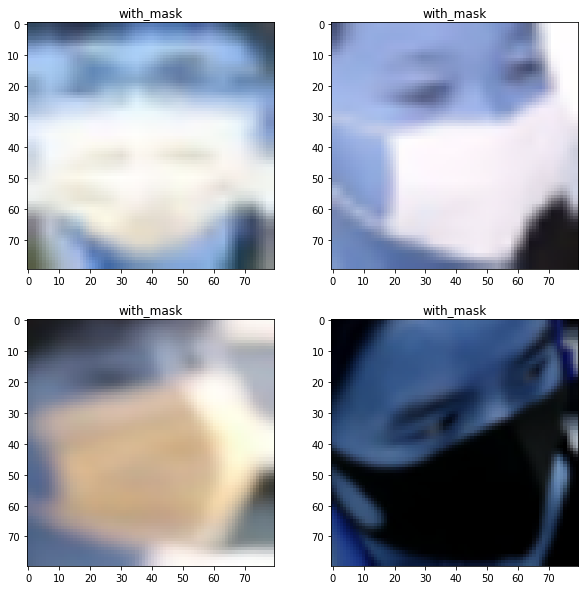

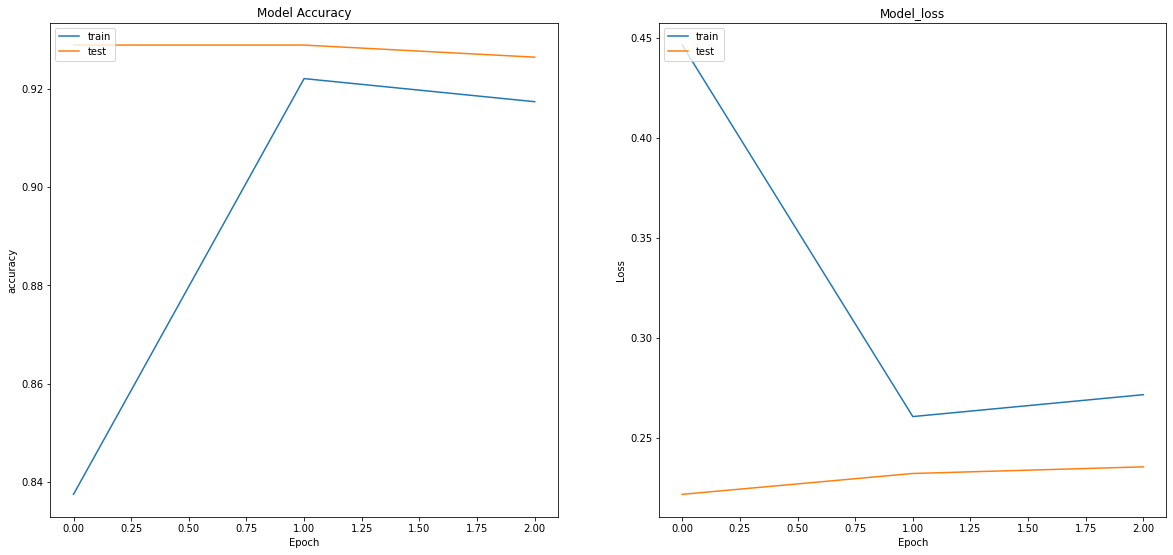

In [6]:
#print(os.listdir(Dir))
images_path = '/content/drive/MyDrive/Data/images'
print("Image path = {}".format(images_path))
print("Total number of images : {}".format(len(os.listdir(images_path))))
Annotation_path = '/content/drive/MyDrive/Data/annotations'
print("Annotation path = {}".format(Annotation_path))
print("Total Annotation files are {}".format(len(os.listdir(Annotation_path))))

Image_width = 80
Image_height = 80
Image_array = []
Labels = []

#Check label files are according to images files
Sorted_files = sorted(os.listdir(Annotation_path))
print(Sorted_files)
Sorted_images_path = sorted(os.listdir(images_path))
print(Sorted_images_path)

# Prepare data and respective labels
def get_box(obj):
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]


for file in tqdm(sorted(os.listdir(Annotation_path)),desc='Preparing data..'):

    file_path = Annotation_path + "/" + file
    xml = ET.parse(file_path)
    root = xml.getroot()
    image_path = images_path + "/" + root[1].text

     
    for bndbox in root.iter('bndbox'):

        [xmin, ymin, xmax, ymax] = get_box(bndbox)
        img = cv2.imread(image_path)
        face_img = img[ymin:ymax,xmin:xmax]
        face_img  = cv2.resize(face_img,(Image_width,Image_height))
        Image_array.append(np.array(face_img)) 
    
    for obj in root.findall('object'):

        name = obj.find('name').text 
        Labels.append(np.array(name)) 
        
# Normalize the data
num_classes = 3
X = np.array(Image_array)
X = X/255

# Convert text to numerical values 
le = LabelEncoder()
y = le.fit_transform(Labels)
y  = to_categorical(y,num_classes)

#Check the total Images and label length are equal 
print(X.shape)
print(y.shape)

#Check random images 
fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range(2):
        l = rn.randint(0,len(Labels))
        ax[i,j].imshow(Image_array[l])
        ax[i,j].set_title(Labels[l])
        
#Split the data for training and validation        
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.20,random_state = 42)
#Check the total training images
print(X_train.shape)
print(y_train.shape)  

# design model
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (Image_width,Image_height,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 96,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(3,activation = "softmax"))


Batch_size = 64
Epochs = 20
seed = 1000

#Augmented Images
train_datagen = ImageDataGenerator(
                    rotation_range = 10,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest')
#Callbacks
Estop = EarlyStopping(monitor = 'val_loss',patience = 2,verbose = 1,min_delta = 0.01)
Red_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 3,verbose = 1,factor = 0.1)

#Compile the model
model.compile(optimizer = Adam(lr = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()
history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = Batch_size),steps_per_epoch = X_train.shape[0]//Batch_size,epochs = Epochs,validation_data = (X_val,y_val),verbose=1,callbacks=[Estop])

#plot the history
def plot_model_performance(history):
    fig =plt.figure(figsize = (20,20))
    #plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc ="upper left")
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc ="upper left")
    plt.show()


    
plot_model_performance(history)

In [2]:
# https://www.kaggle.com/giwilorjelly/detecting-masks-and-social-distancing-violations
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance

In [15]:
face_model = cv2.CascadeClassifier('../input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml')

In [17]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/drive/MyDrive/Data/images/maksssksksss244.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
faces = face_model.detectMultiScale(img) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
plt.figure(figsize=(10,10))
plt.imshow(out_img)


error: ignored

In [14]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import os
from PIL import Image
import cv2
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [6]:
!pip install xmltodict #installing the library to read XMl files
import xmltodict

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# https://www.kaggle.com/prekshabhavsar/face-mask-detection-with-92-accuracy
data_folder = '/content/drive/MyDrive/Data' #Change this path!!
root_folder = '/content/drive/MyDrive'
path_im = '/content/drive/MyDrive/Data/images/'
images_path = '/content/drive/MyDrive/Data/images'
print("Image path = {}".format(images_path))
print("Total number of images : {}".format(len(os.listdir(images_path))))
Annotation_path = '/content/drive/MyDrive/Data/annotations'
print("Annotation path = {}".format(Annotation_path))
print("Total Annotation files are {}".format(len(os.listdir(Annotation_path))))
path_an = '/content/drive/MyDrive/Data/annotations/'

Mounted at /content/drive
Image path = /content/drive/MyDrive/Data/images
Total number of images : 853
Annotation path = /content/drive/MyDrive/Data/annotations
Total Annotation files are 853


# **I. Exploratory Data Analysis**

In [10]:
plt.style.use(['seaborn-white'])

PATH = '/content/drive/MyDrive/Data'
os.listdir(PATH)
ANNOTATIONS_PATH = os.path.join(PATH, "annotations")
IMAGE_PATH = os.path.join(PATH, "images")


data = []
sorted_annot_list = sorted(os.listdir(ANNOTATIONS_PATH), key=lambda x: int(x.split('.')[0][12:]))

for f_name in tqdm(sorted_annot_list):
    with open(os.path.join(ANNOTATIONS_PATH, f_name), 'r') as file:
        annot = xmltodict.parse(file.read())['annotation']
        if type(annot['object']) != list:
            annot['object'] = [annot['object']]
        data.append(annot)

data_df = pd.json_normalize(data)

A. Vizualize the histogram ranking the images by the number of objects detected for each images

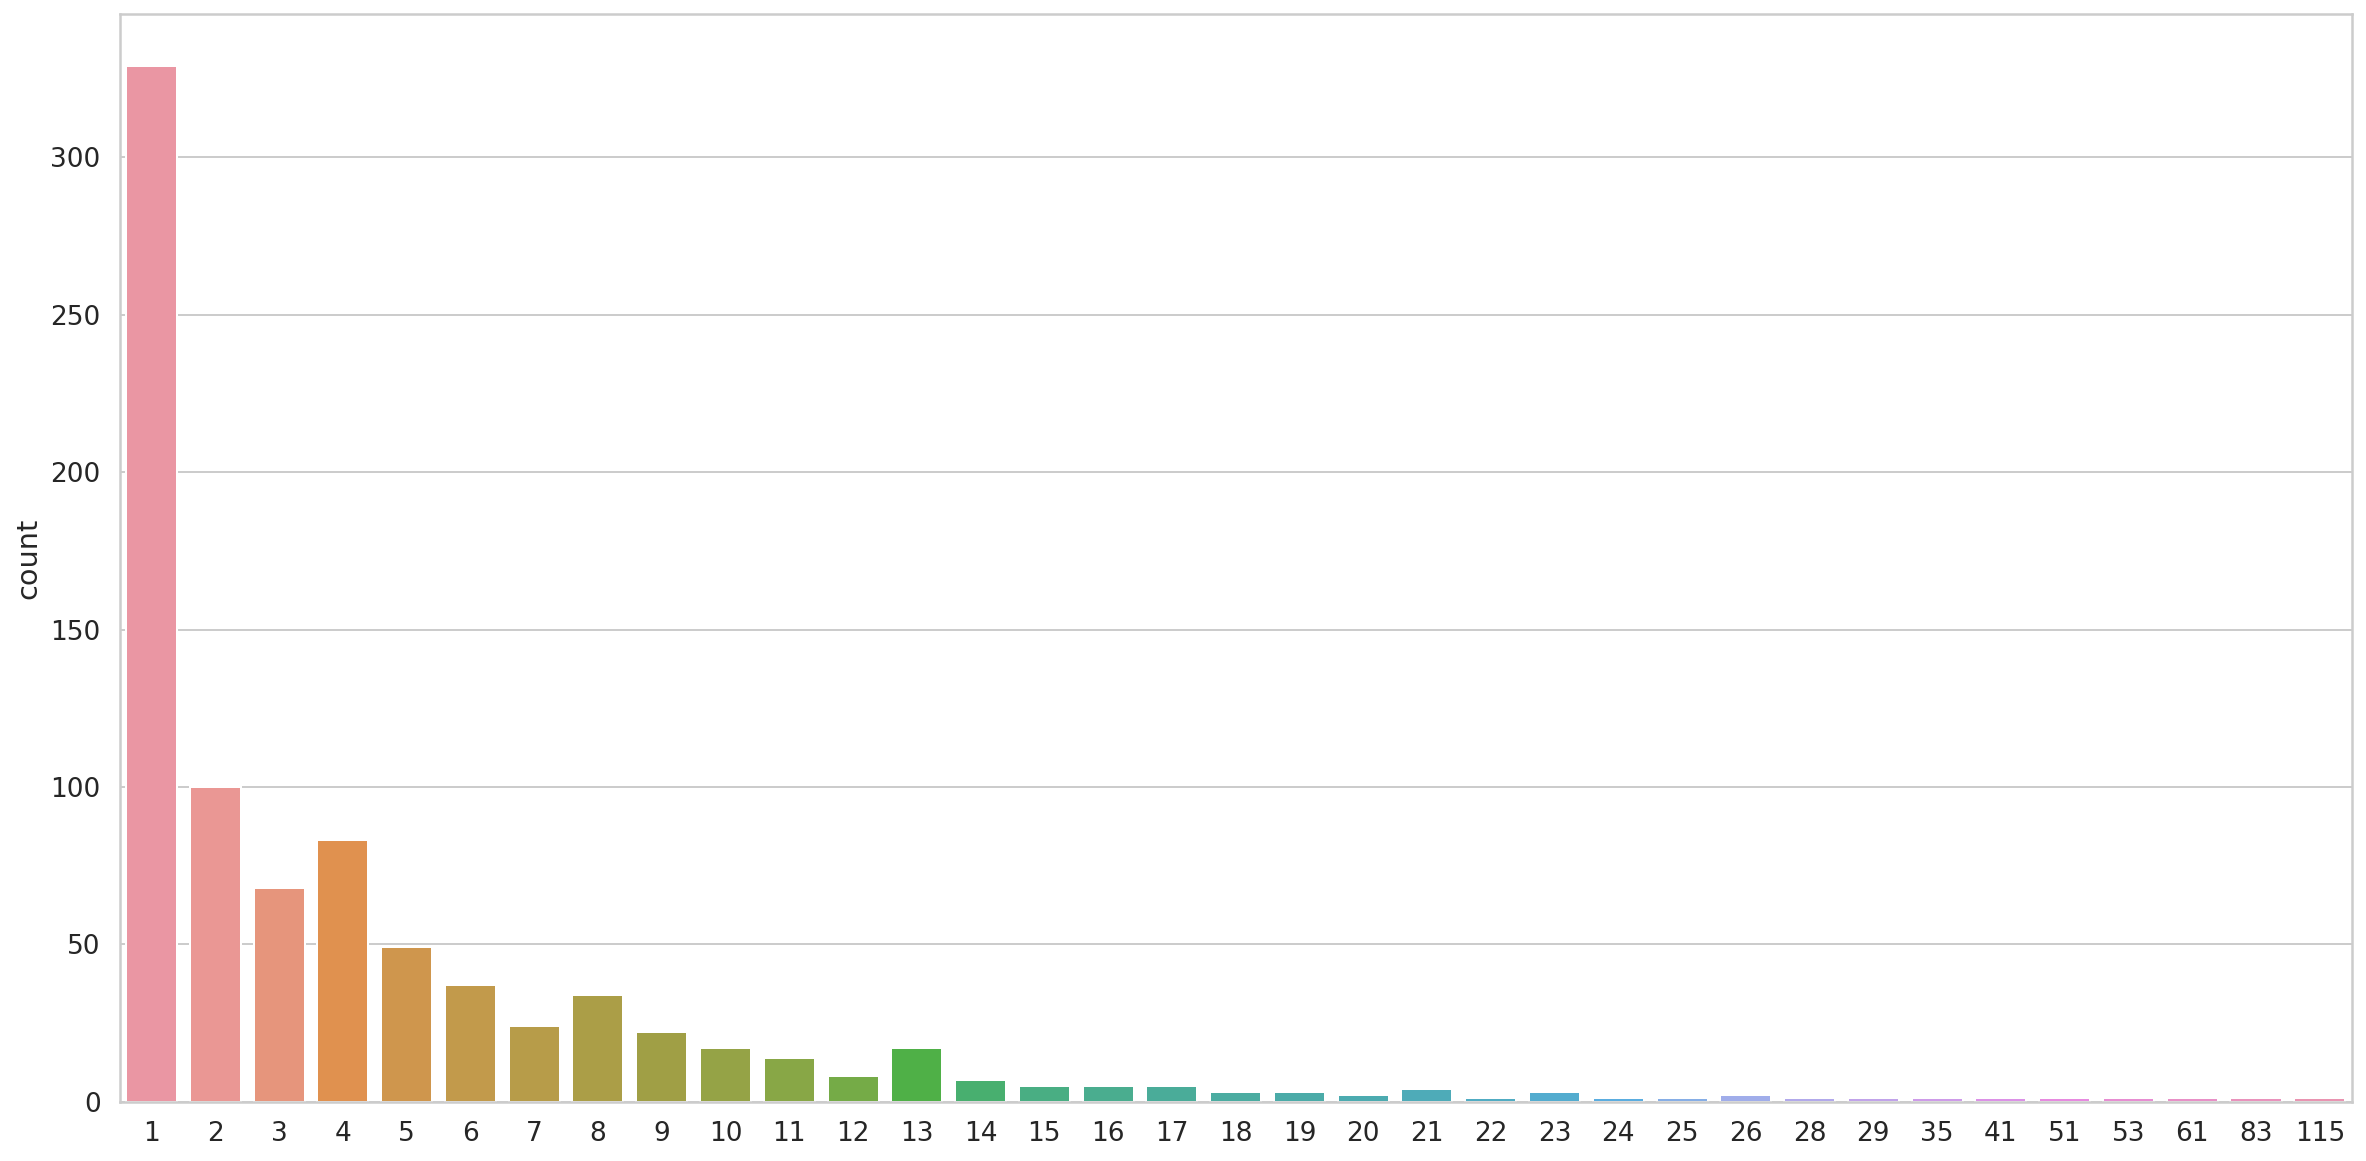

In [15]:
data_df['num_of_object'] = data_df.object.map(len)
plt.figure(figsize=(20, 10))
sns.countplot(data_df.num_of_object.values)
plt.show()

We can see that in roughly 75% of images they are between 1 and 4 instances detected (mask badly wore, no mask or masked people). So it is possibly a first bias of the dataset.


In [16]:
data_df[data_df.num_of_object <= 15].num_of_object.sum()
data_df = data_df[data_df.num_of_object <= 15]

from itertools import chain

num_object_per_images = data_df.num_of_object

image_data = pd.DataFrame({
    'filename': np.repeat(data_df['filename'], num_object_per_images), 
    'segmented': np.repeat(data_df['segmented'], num_object_per_images), 
    'object': chain.from_iterable(data_df['object'].values), 
    'width': np.repeat(data_df['size.width'], num_object_per_images),
    'height': np.repeat(data_df['size.height'], num_object_per_images),
    'depth': np.repeat(data_df['size.depth'], num_object_per_images)
})

image_data.reset_index(inplace=True, drop=True)
objects = pd.DataFrame(image_data.object.map(dict).tolist())
data = pd.concat([image_data, objects], axis=1)
data.drop(columns='object', inplace=True)


In [17]:
data

,filename,segmented,width,height,depth,name,pose,truncated,occluded,difficult,bndbox
0,maksssksksss0.png,0,512,366,3,without_mask,Unspecified,0,0,0,"{'xmin': '79', 'ymin': '105', 'xmax': '109', '..."
1,maksssksksss0.png,0,512,366,3,with_mask,Unspecified,0,0,0,"{'xmin': '185', 'ymin': '100', 'xmax': '226', ..."
2,maksssksksss0.png,0,512,366,3,without_mask,Unspecified,0,0,0,"{'xmin': '325', 'ymin': '90', 'xmax': '360', '..."
3,maksssksksss1.png,0,400,156,3,with_mask,Unspecified,0,0,0,"{'xmin': '321', 'ymin': '34', 'xmax': '354', '..."
4,maksssksksss1.png,0,400,156,3,with_mask,Unspecified,0,0,0,"{'xmin': '224', 'ymin': '38', 'xmax': '261', '..."
...,...,...,...,...,...,...,...,...,...,...,...
2979,maksssksksss850.png,0,400,200,3,with_mask,Unspecified,0,0,0,"{'xmin': '146', 'ymin': '30', 'xmax': '176', '..."
2980,maksssksksss850.png,0,400,200,3,with_mask,Unspecified,0,0,0,"{'xmin': '323', 'ymin': '47', 'xmax': '351', '..."
2981,maksssksksss851.png,0,301,400,3,with_mask,Unspecified,0,0,0,"{'xmin': '66', 'ymin': '205', 'xmax': '156', '..."
2982,maksssksksss852.png,0,267,400,3,with_mask,Unspecified,0,0,0,"{'xmin': '139', 'ymin': '94', 'xmax': '198', '..."


In [19]:
data.drop(columns=['segmented','depth','truncated','occluded','difficult', 'pose'], inplace=True)
data

,filename,width,height,name,bndbox
0,maksssksksss0.png,512,366,without_mask,"{'xmin': '79', 'ymin': '105', 'xmax': '109', '..."
1,maksssksksss0.png,512,366,with_mask,"{'xmin': '185', 'ymin': '100', 'xmax': '226', ..."
2,maksssksksss0.png,512,366,without_mask,"{'xmin': '325', 'ymin': '90', 'xmax': '360', '..."
3,maksssksksss1.png,400,156,with_mask,"{'xmin': '321', 'ymin': '34', 'xmax': '354', '..."
4,maksssksksss1.png,400,156,with_mask,"{'xmin': '224', 'ymin': '38', 'xmax': '261', '..."
...,...,...,...,...,...
2979,maksssksksss850.png,400,200,with_mask,"{'xmin': '146', 'ymin': '30', 'xmax': '176', '..."
2980,maksssksksss850.png,400,200,with_mask,"{'xmin': '323', 'ymin': '47', 'xmax': '351', '..."
2981,maksssksksss851.png,301,400,with_mask,"{'xmin': '66', 'ymin': '205', 'xmax': '156', '..."
2982,maksssksksss852.png,267,400,with_mask,"{'xmin': '139', 'ymin': '94', 'xmax': '198', '..."


In [20]:
data['name'].value_counts()

with_mask                2365
without_mask              515
mask_weared_incorrect     104
Name: name, dtype: int64

In [33]:
data['name'].unique()

KeyError: ignored

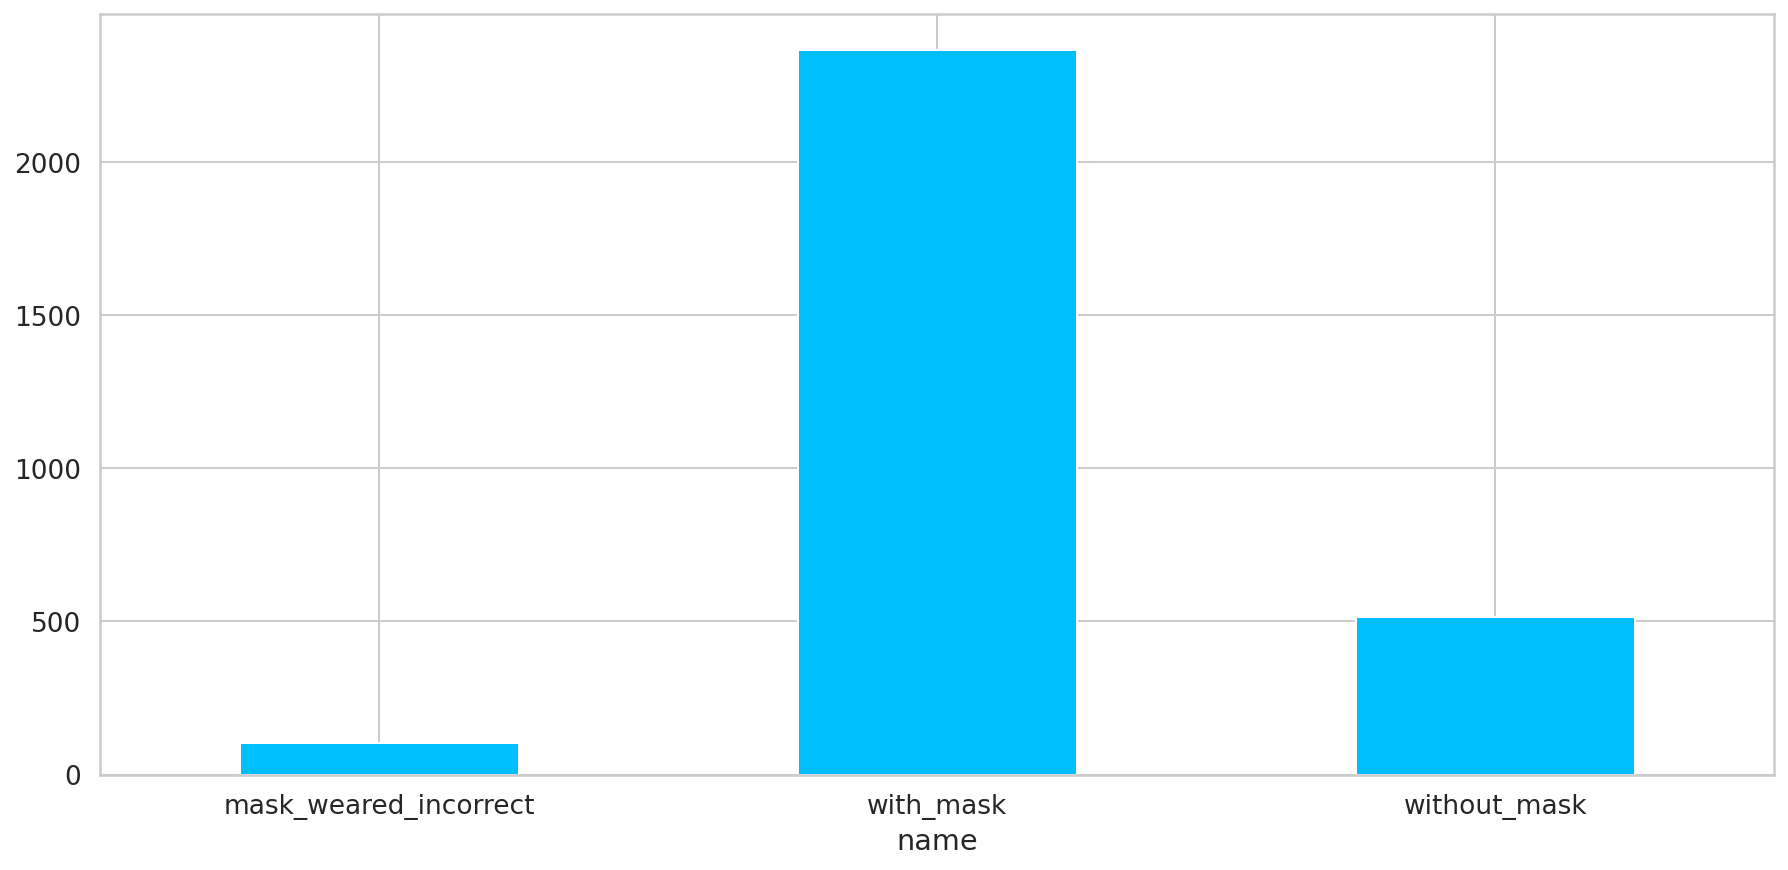

In [37]:
data.groupby('name')['filename'].count().plot.bar(figsize=(15,7), rot=0, grid=True)

In [8]:
# Read parse and store the images

imagenames=[] # list of imagefile names
xmlnames=[] # list of xmlfile names

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            imagenames.append(filename)
        else:
            xmlnames.append(filename)

listing=[]
for i in imagenames[:]:
    with open(path_an+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])

for i in  set(listing):
    print(i)

without_mask
with_mask
mask_weared_incorrect


In [8]:
# mapping for predictions and analysis purpose
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

# function to visualize images
def draw_bounding_box(input_image):
  
    with open(path_an+input_image[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_im+input_image))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            if temp[i]["name"]=="with_mask":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='g',facecolor="none",)
                ax.add_patch(patch)
            if temp[i]["name"]=="without_mask":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))     
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='r',facecolor="none",)
                ax.add_patch(patch)
            if temp[i]["name"]=="mask_weared_incorrect":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='y',facecolor="none",)
                ax.add_patch(patch)
    else:
        a,b,c,d=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"g","mask_weared_incorrect":"y"}
        patch=patches.Rectangle((a,b),d-b,c-a,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(patch)

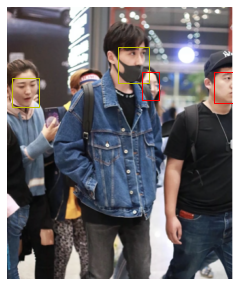

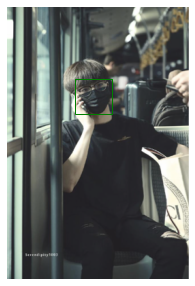

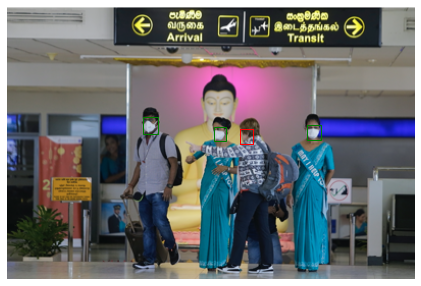

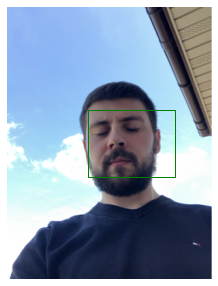

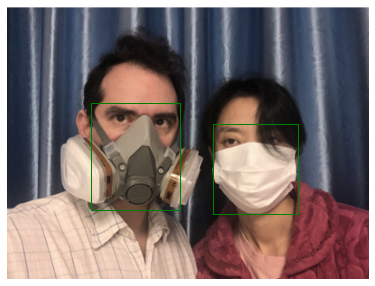

In [9]:
for i in range(15,20):
    draw_bounding_box(imagenames[i])

In [10]:
def make_dataset(no_of_images): #function to make dataset
    
    image_tensor=[]
    label_tensor=[]
    
    for i,j in enumerate(no_of_images):

        with open(path_an+j[:-4]+".xml") as fd:
            doc = xmltodict.parse(fd.read())

        if type(doc["annotation"]["object"])!=list:
            temp = doc["annotation"]["object"]
            a,b,c,d = list(map(int,temp["bndbox"].values()))
            label = options[temp["name"]]
            image = transforms.functional.crop(Image.open(path_im+j).convert("RGB"), b,a,d-b,c-a)
            image_tensor.append(my_transform(image))
            label_tensor.append(torch.tensor(label))
        
        else:
            temp = doc["annotation"]["object"]
            for k in range(len(temp)):
                a,b,c,d=list(map(int,temp[k]["bndbox"].values()))
                label=options[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_im+j).convert("RGB"), b,a,d-b,c-a)
                image_tensor.append(my_transform(image))
                label_tensor.append(torch.tensor(label))
                
    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)

In [11]:
#importing neccessary libraries for deeplearning task..
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader

my_transform=transforms.Compose([transforms.Resize((226,226)),
                                 transforms.ToTensor()])

dataset=make_dataset(imagenames) #making a datset
train_size=int(len(dataset)*0.8)
test_size=len(dataset)-train_size

# Split the dataset between train and testing set
batch_size=32
trainset,testset=torch.utils.data.random_split(dataset,[train_size,test_size])

# Load data with Pytorch DataLoader
train_loader =DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)
test_loader =DataLoader(dataset=testset,batch_size=batch_size,shuffle=True)

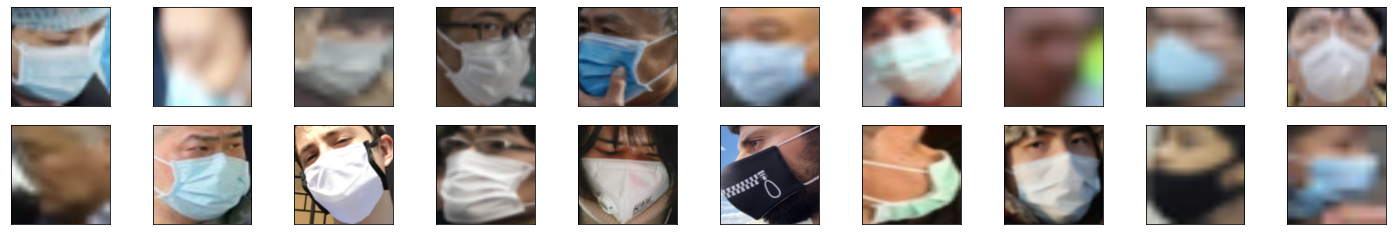

In [12]:
dataiter=iter(train_loader) 
images,labels=dataiter.next()
images=images.numpy()

fig=plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    plt.imshow(np.transpose(images[idx],(1,2,0)))

In [13]:
!pip install geoopt

     |████████████████████████████████| 81kB 5.3MB/s 


In [14]:
import torch.nn as nn
import torch.optim as optim
import geoopt

# We Will use pretrained resnet34 layer model.
resnet = models.resnext50_32x4d(pretrained=True)
for param in resnet.parameters():
    param.requires_grad=False

# 
n_inputs = resnet.fc.in_features
last_layer = nn.Linear(n_inputs,3)
resnet.fc.out_features = last_layer

if torch.cuda.is_available():
    resnet.cuda()
    
print(resnet.fc.out_features)

if torch.cuda.is_available(): #checking for GPU availability
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

for paramet in resnet.parameters():
    paramet.requires_grad=True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(),lr=0.001)
optim = geoopt.optim.RiemannianAdam(resnet.parameters(), lr=0.0001)

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth



Linear(in_features=2048, out_features=3, bias=True)
No GPU available, using the CPU instead.


In [ ]:
n_epochs=20

for epoch in range(1,n_epochs+1):
    train_loss = 0.0


  ########################  TRAIN THE MODEL #################
    for batch,(data,target) in enumerate(train_loader):
    
    
        if torch.cuda.is_available():
            data , target = data.cuda(), target.cuda()
    
        optim.zero_grad()
        output=resnet(data)
        loss=criterion(output,target)
        loss.backward()
        optim.step()
        train_loss += loss.item()

        if batch%20==19:
            print("Epoch {}, batch {}, training loss {}".format(epoch, batch+1,train_loss/20))
        train_loss = 0.0

#########Testing##########
test_loss=0.0
acc=0
resnet.eval()

for data,target in test_loader:

    if torch.cuda.is_available():
        data,target=data.cuda(),target.cuda()
    output = resnet(data)
    loss = criterion(output,target)
    test_loss += loss.item()
    _, pred = torch.max(output,1)
    predicted = pred.numpy()[:,np.newaxis] if not torch.cuda.is_available() else pred.cpu().numpy()[:,np.newaxis]
    actual = target.numpy()[:,np.newaxis] if not torch.cuda.is_available() else target.cpu().numpy()[:,np.newaxis]
    acc += np.sum(predicted==actual)/len(target.cpu().numpy())

Average_loss = test_loss/len(test_loader)
Average_acc = acc/len(test_loader)

print("Avg total loss is {:.6f}".format(Average_loss))
print("Avg accuracy is {:.6f}".format(Average_acc))

torch.save(resnet,open("resnet_model_face_mask","wb"))

Epoch 1, batch 20, training loss 0.0053076639771461485
Epoch 1, batch 40, training loss 0.029234039783477783
Epoch 1, batch 60, training loss 0.012082978338003158
Epoch 1, batch 80, training loss 0.0044609267264604565
Epoch 1, batch 100, training loss 0.0055051490664482115
Epoch 2, batch 20, training loss 0.0018369363620877265
Epoch 2, batch 40, training loss 0.00105088222771883
Epoch 2, batch 60, training loss 0.005121297389268875
Epoch 2, batch 80, training loss 0.0035997342318296434
Epoch 2, batch 100, training loss 0.0029271647334098818
Epoch 3, batch 20, training loss 0.0008089561015367508
Epoch 3, batch 40, training loss 0.014433380961418153
Epoch 3, batch 60, training loss 0.0005591003224253655
Epoch 3, batch 80, training loss 0.0006516239605844021
Epoch 3, batch 100, training loss 0.006752609461545944
Epoch 4, batch 20, training loss 0.0037007980048656464
Epoch 4, batch 40, training loss 0.0002150826621800661
Epoch 4, batch 60, training loss 0.0029194405302405356


In [1]:
torch.save(resnet,open("resnet_model_face_mask","wb")) # saving the trained model.

NameError: ignored

In [22]:
device = torch.device("cuda")
model=torch.load(open("resnet_model_face_mask","rb"),map_location=device) #loading the model

In [23]:
!pip install mtcnn #installing library for predicting faces

     |████████████████████████████████| 2.3MB 25.8MB/s 


In [1]:
#https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49
from mtcnn import MTCNN
detect = MTCNN()

ModuleNotFoundError: ignored

In [25]:
def trans(bndbox,newimage):
    a,b,c,d=bndbox["box"]
    image_crop=transforms.functional.crop(newimage, b,a,d-b,c-a)
    my_transform=transforms.Compose([transforms.Resize((226,226)),
                                     transforms.RandomCrop((224,224)),
                                     transforms.ToTensor()])(image_crop)
    return my_transform

In [26]:
def tag_plot(bndbox,filepath,predicted):
    configut=["with_mask","without_mask","mask_weared_incorrect"]
    x=plt.imread(filepath)
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(15,10)
    for i,j in zip(bndbox,predicted):
        a,b,c,d=i["box"]
        patch=patches.Rectangle((a,b),c,d,linewidth=1, edgecolor='r',facecolor="none",)
        ax.imshow(x)
        ax.text(a, b, configut[predicted[0]], size=10,
                style='italic',verticalalignment="bottom", horizontalalignment="left",color="blue")
        ax.add_patch(patch)

In [27]:
model=model.eval()
def testing(filepath):
    configut=["with_mask","without_mask","mask_weared_incorrect"]
    img = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    newimage=Image.open(filepath).convert("RGB")
    bndbox=detect.detect_faces(img)
    if len(bndbox)==1:
        image_pred=trans(bndbox[0],newimage).unsqueeze(0)
        _, pred=torch.max(model(image_pred.to(device)),1)
        tag_plot(bndbox,filepath,predicted=pred)
    else:
        predicted=[]
        for i in bndbox:
            image_pred=trans(i,newimage).unsqueeze(0)
            _, pred=torch.max(model(image_pred.to(device)),1)
            predicted.append(pred)
        tag_plot(bndbox,filepath,predicted)

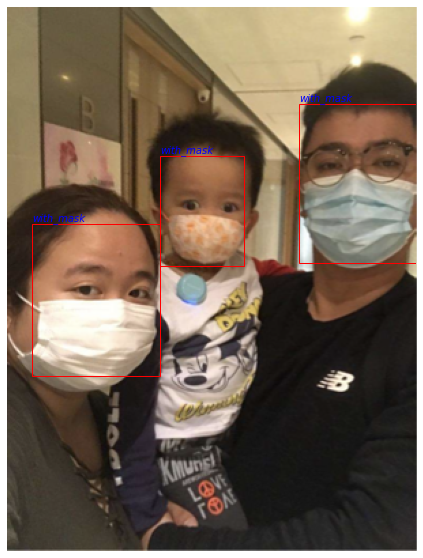

In [28]:
testing(path_im+imagenames[118]) # if you have images you can test them using this function..

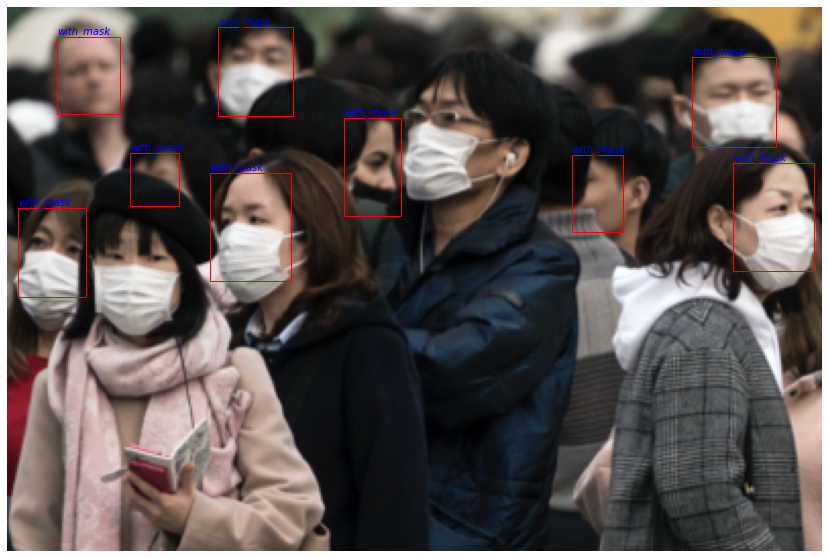

In [30]:
testing(path_im+imagenames[158])